In [2]:
import numpy as np
from keras import layers
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

from cnn_utils import *
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

Using TensorFlow backend.


In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


y = 0


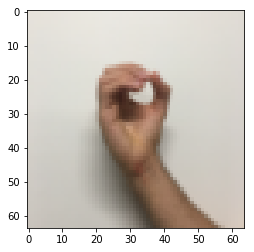

In [4]:
# Example of a picture
index = 401
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [5]:
def hand_model():
    model = Sequential()
    model.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(4, 4),strides=(4,4)))
    model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(4, 4),strides=(4,4)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(32))
    model.add(Dense(32))
    model.add(Dense(16))
    model.add(Dense(6, activation='softmax'))
    return model



In [6]:
model1 = hand_model()

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],lr=0.001)
history=model1.fit(X_train, Y_train, epochs=100, batch_size=64)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1080/1080 [==============================] - 4s 4ms/step - loss: 1.8002 - acc: 0.1667
Epoch 2/100
1080/1080 [==============================] - 4s 3ms/step - loss: 1.7758 - acc: 0.2120
Epoch 3/100
1080/1080 [==============================] - 4s 3ms/step - loss: 1.6518 - acc: 0.3574
Epoch 4/100
1080/1080 [==============================] - 4s 4ms/step - loss: 1.4257 - acc: 0.4306
Epoch 5/100
1080/1080 [==============================] - 4s 3ms/step - loss: 1.0678 - acc: 0.5963
Epoch 6/100
1080/1080 [==============================] - 4s 3ms/step - loss: 0.8686 - acc: 0.6713
Epoch 7/100
1080/1080 [==============================] - 4s 4ms/step - loss: 0.7747 - acc: 0.6722
Epoch 8/100
1080/1080 [==============================] - 4s 4ms/step - loss: 0.5494 - acc: 0.8028
Epoch 9/100
1080/1080 [==============================] - 4s 4ms/step - loss: 0.4500 - acc: 0.833

In [7]:
preds = model1.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)

print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

120/120 [==============================] - 0s 2ms/step

Loss = 0.20382870932420094
Test Accuracy = 0.9583333293596904


Text(0.5, 1.0, 'Accuracy Curves')

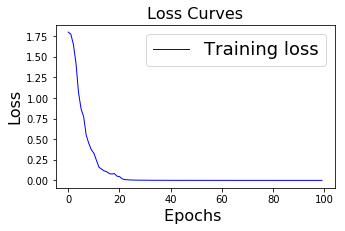

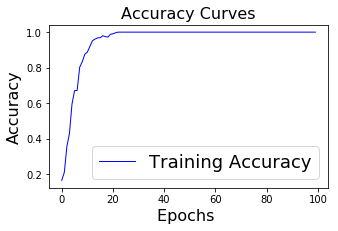

In [8]:
plt.figure(figsize=[5,3])
plt.plot(history.history['loss'],'b',linewidth=1.0)
#plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
  
# Accuracy Curves
plt.figure(figsize=[5,3])
plt.plot(history.history['acc'],'b',linewidth=1.0)
#plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

5


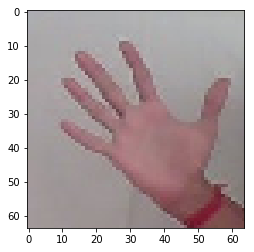

In [127]:
img_path = '05.jpg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(np.argmax(model1.predict(x)))

In [128]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 64, 64, 16)        1216      
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 16, 16, 32)        12832     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 2, 2, 128)         73856     
__________

In [130]:
model1.save('hand_model.h5')

In [4]:
from keras.models import load_model
new_model = load_model('hand_model2.h5')

4


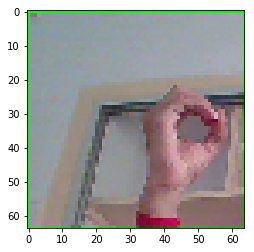

In [10]:
img_path = 'webcam.jpeg'
img = image.load_img(img_path, target_size=(64, 64))
imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(np.argmax(new_model.predict(x)))